In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [4]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 [==============================] - 8s 23ms/step - loss: 0.5595 - accuracy: 0.0027 - val_loss: 0.4570 - val_accuracy: 0.0020
Epoch 2/5
47/47 [==============================] - 0s 10ms/step - loss: 0.4148 - accuracy: 0.0042 - val_loss: 0.3900 - val_accuracy: 0.0060
Epoch 3/5
47/47 [==============================] - 1s 16ms/step - loss: 0.3751 - accuracy: 0.0065 - val_loss: 0.3686 - val_accuracy: 0.0100
Epoch 4/5
47/47 [==============================] - 1s 13ms/step - loss: 0.3575 - accuracy: 0.0073 - val_loss: 0.3546 - val_accuracy: 0.0130
Epoch 5/5
47/47 [==============================] - 1s 12ms/step - loss: 0.3459 - accuracy: 0.0087 - val_loss: 0.3451 - val_accuracy: 0.0050


In [8]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 1s 6ms/step


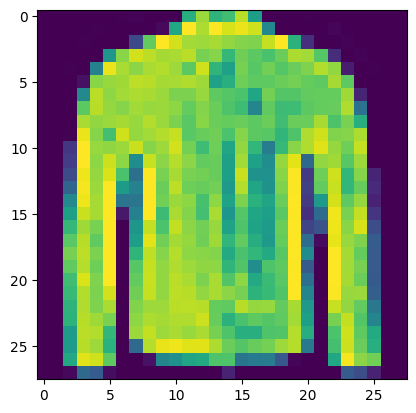

In [9]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

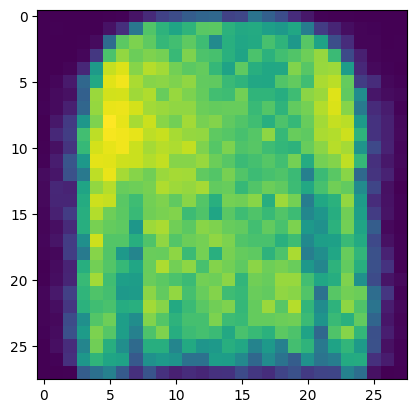

In [10]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

#1. Add one more hidden layer to autoencoder

In [11]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.3238 - accuracy: 0.0125 - val_loss: 0.2950 - val_accuracy: 0.0169
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2868 - accuracy: 0.0201 - val_loss: 0.2855 - val_accuracy: 0.0212
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2811 - accuracy: 0.0235 - val_loss: 0.2811 - val_accuracy: 0.0283
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2775 - accuracy: 0.0271 - val_loss: 0.2789 - val_accuracy: 0.0282
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2757 - accuracy: 0.0299 - val_loss: 0.2771 - val_accuracy: 0.0309


#2. Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [12]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


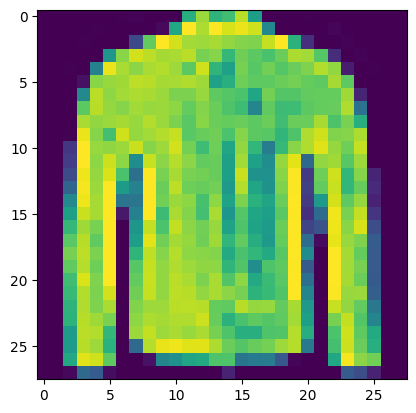

In [13]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

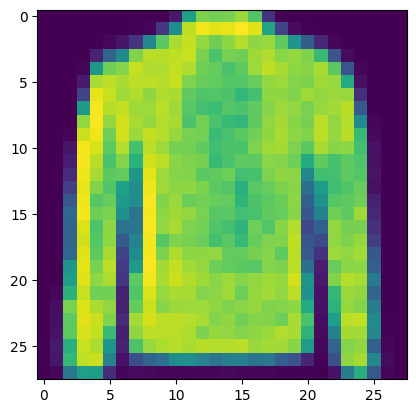

In [14]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()